# Boston Housing Dataset

** The objective is to predict the value of prices of the house using the given features. **

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline  

matplotlib is library to plot graphs, 
%matplotlib inline   is to show graph inline in jupyter

** Load the Boston Housing DataSet from scikit-learn **

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [8]:
bostonDF.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

**Load the data into pandas dataframe**

In [10]:
bostonDF = pd.DataFrame(data=boston.data, columns = boston.feature_names)

** lets check out the head and shape of the dataframe **

In [11]:
bostonDF.shape    

(506, 13)

In [12]:
bostonDF.head()  

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [18]:
bostonDF['MEDV'] = boston.target

** Lets check correlation between columns with the help of heatmap **
    
    sns.set(rc={'figure.figsize':(10,8)})

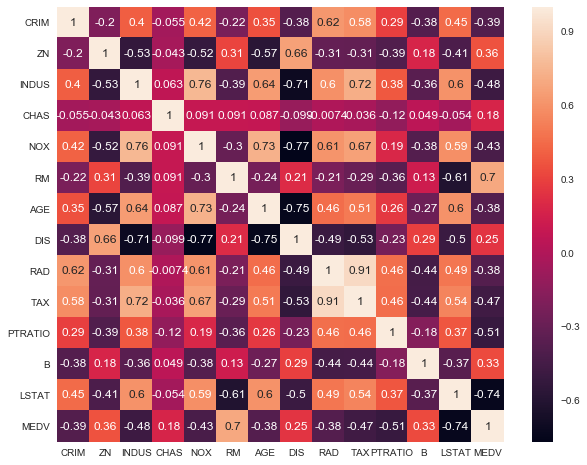

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(bostonDF.corr(), annot=True)

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV.

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

### X and y arrays

In [30]:
X = bostonDF[['LSTAT', 'RM']]
y = bostonDF['MEDV']

## Train Test Split

We will train out model on the training set and then use the test set to test the results.

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use of random_state = same random_state value will give same result to all the users

## Creating and Training the Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_predictions = lr.predict(X_test)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [37]:
error = y_test - y_predictions

In [38]:
from sklearn import metrics

In [39]:
mae = metrics.mean_absolute_error(y_test, y_predictions)

In [40]:
mse = metrics.mean_squared_error(y_test, y_predictions)

In [41]:
rmse = np.sqrt(mse)

In [42]:
print('MAE: ', mae)

MAE:  4.38047475613


In [43]:
print('MSE: ', mse)

MSE:  36.5411313312


In [44]:
print('RMSE: ', rmse)

RMSE:  6.04492608154


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **RM** is associated with an **increase of RM coef value **.
- Holding all other features fixed, a 1 unit increase in **LSTAT** is associated with an **decrease of RM coef value **.

In [49]:
coefDF = pd.DataFrame(lr.coef_)

In [50]:
coefDF.columns = ['Coefficeints']

In [51]:
coefDF

Coefficeints
0     -0.673061
1      4.636033

-ve coefficientit is inversely realted to target value